In [108]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

df = pd.read_csv('who life expectancy 2022 (3) (version 1).xlsb (3).csv')
df.head()


,Country,Total populationa (000s) / Male,Total populationa (000s) / Female,Total populationa (000s) / Both sexes,Life expectancy at birthb (years) / Male,Life expectancy at birthb (years) / Female,Life expectancy at birthb (years) / Both sexes,Healthy life expectancy at birthb (years) / Male,Healthy life expectancy at birthb (years) / Female,Healthy life expectancy at birthb (years) / Both sexes,...,Proportion of population using a hand-washing facility with soap and waterad (%),Proportion of safely treated domestic wastewater flowsae (%),Amount of water- and sanitation-related official development assistance that is part of a government-coordinated spending planaf (constant 2020 US$ millions),Proportion of population with primary reliance on clean fuels and technologyag (%),Annual mean concentrations of fine particulate matter (PM2.5) in urban areasag (µg/m3),Mortality rate due to homicidek (per 100 000 population),Number of cases of poliomyelitis caused by wild poliovirus (WPV)ah,Age-standardized prevalence of hypertension among adults aged 30-79 yearsai (%),Prevalence of obesity among children and adolescents (5–19 years)aj (%),Age-standardized prevalence of obesity among adults (18+ years)aj (%)
0,Afghanistan,19976.0,18952.0,38928,63.3,63.2,63.2,54.7,53.2,53.9,...,38.0,NaN,140.29,33.0,63.6,8.5,1.0,40.2,3.1,5.5
1,Albania,1465.0,1413.0,2878,76.3,79.9,78.0,68.0,70.3,69.1,...,NaN,13.0,48.53,81.0,19.3,3.6,0.0,41.8,7.6,21.7
2,Algeria,22154.0,21697.0,43851,76.2,78.1,77.1,66.7,66.1,66.4,...,85.0,76.0,3.01,100.0,34.1,1.7,0.0,36.2,13.5,27.4
3,Andorra,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,100.0,9.5,NaN,NaN,31.0,12.8,25.6
4,Angola,16261.0,16605.0,32866,60.7,65.5,63.1,53.6,56.2,54.8,...,27.0,NaN,4.61,50.0,40.3,9.2,0.0,38.7,2.4,8.2


In [109]:
print(df.shape)

(194, 65)


In [110]:
print(df.columns)

Index(['Country', 'Total populationa (000s) / Male',
       'Total populationa (000s) / Female',
       'Total populationa (000s) / Both sexes',
       'Life expectancy at birthb (years) / Male',
       'Life expectancy at birthb (years) / Female',
       'Life expectancy at birthb (years) / Both sexes',
       'Healthy life expectancy at birthb (years) / Male',
       'Healthy life expectancy at birthb (years) / Female',
       'Healthy life expectancy at birthb (years) / Both sexes',
       'Maternal mortality ratioc (per 100 000 live births)',
       'Proportion of births attended by skilled health personneld (%)',
       'Under-five mortality ratee (per 1000 live births)',
       'Neonatal mortality ratee (per 1000 live births)',
       'New HIV infectionsf (per 1000 uninfected population)',
       'Tuberculosis incidenceg (per 100 000 population)',
       'Malaria incidenceh (per 1000 population at risk)',
       'Hepatitis B surface antigen (HBsAg) prevalence among children under

In [111]:
df.columns.values.tolist()

['Country',
 'Total populationa (000s) / Male',
 'Total populationa (000s) / Female',
 'Total populationa (000s) / Both sexes',
 'Life expectancy at birthb (years) / Male',
 'Life expectancy at birthb (years) / Female',
 'Life expectancy at birthb (years) / Both sexes',
 'Healthy life expectancy at birthb (years) / Male',
 'Healthy life expectancy at birthb (years) / Female',
 'Healthy life expectancy at birthb (years) / Both sexes',
 'Maternal mortality ratioc (per 100 000 live births)',
 'Proportion of births attended by skilled health personneld (%)',
 'Under-five mortality ratee (per 1000 live births)',
 'Neonatal mortality ratee (per 1000 live births)',
 'New HIV infectionsf (per 1000 uninfected population)',
 'Tuberculosis incidenceg (per 100 000 population)',
 'Malaria incidenceh (per 1000 population at risk)',
 'Hepatitis B surface antigen (HBsAg) prevalence among children under 5 yearsi (%)',
 'Reported number of people requiring interventions against NTDsj',
 'Probability of 

In [112]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer
#print(df)
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
listOfValues = df.columns.values.tolist()
for i in range(1, 64):
    df[listOfValues[i]] = imputer.fit_transform(df[[listOfValues[i]]])



def clean(df):
    # Clean df
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = (df < lower_bound) | (df > upper_bound)
    print("Number of outliers:", outliers.sum().sum())
    df_cleaned = df[~outliers.any(axis=1)]

    return df_cleaned

df = clean(df)

In [113]:



df.describe()


,Total populationa (000s) / Male,Total populationa (000s) / Female,Total populationa (000s) / Both sexes,Life expectancy at birthb (years) / Male,Life expectancy at birthb (years) / Female,Life expectancy at birthb (years) / Both sexes,Healthy life expectancy at birthb (years) / Male,Healthy life expectancy at birthb (years) / Female,Healthy life expectancy at birthb (years) / Both sexes,Maternal mortality ratioc (per 100 000 live births),...,Proportion of population using a hand-washing facility with soap and waterad (%),Proportion of safely treated domestic wastewater flowsae (%),Amount of water- and sanitation-related official development assistance that is part of a government-coordinated spending planaf (constant 2020 US$ millions),Proportion of population with primary reliance on clean fuels and technologyag (%),Annual mean concentrations of fine particulate matter (PM2.5) in urban areasag (µg/m3),Mortality rate due to homicidek (per 100 000 population),Number of cases of poliomyelitis caused by wild poliovirus (WPV)ah,Age-standardized prevalence of hypertension among adults aged 30-79 yearsai (%),Prevalence of obesity among children and adolescents (5–19 years)aj (%),Age-standardized prevalence of obesity among adults (18+ years)aj (%)
count,194.000000,194.000000,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,190.000000
mean,21374.907104,21017.213115,3.999053e+04,70.137705,74.996175,72.535519,62.072678,64.562295,63.318033,160.819672,...,52.923077,54.060870,60.010815,67.612565,28.549474,8.398907,0.032787,37.533854,9.022632,20.020526
std,76142.612872,71846.880261,1.482976e+05,7.001987,6.942356,6.922247,6.130601,6.010186,6.027558,226.702346,...,20.209721,25.517704,71.514916,37.288494,18.318998,11.799196,0.303719,6.638040,6.322447,11.410088
min,47.000000,48.000000,2.000000e+00,47.700000,54.200000,50.700000,42.300000,46.400000,44.200000,2.000000,...,5.000000,1.000000,0.010000,0.000000,5.800000,0.200000,0.000000,20.700000,1.000000,2.100000
25%,1504.250000,1511.250000,1.995750e+03,64.800000,69.475000,67.325000,57.300000,59.625000,58.600000,15.250000,...,52.923077,40.250000,10.007500,33.500000,14.425000,1.825000,0.000000,32.300000,4.000000,9.600000
50%,5219.500000,5340.000000,8.842000e+03,70.137705,75.650000,73.200000,62.350000,65.500000,64.100000,63.000000,...,52.923077,54.060870,60.010815,86.000000,23.950000,4.900000,0.000000,37.950000,8.500000,20.700000
75%,19665.000000,18995.500000,2.896175e+04,74.900000,79.900000,77.275000,66.175000,69.300000,67.200000,181.500000,...,52.923077,64.500000,60.010815,100.000000,37.950000,9.000000,0.000000,42.600000,11.850000,25.675000
max,741999.000000,705471.000000,1.447470e+06,81.800000,86.900000,84.300000,72.600000,75.500000,74.100000,1150.000000,...,100.000000,100.000000,428.070000,100.000000,89.400000,85.000000,4.000000,56.400000,33.200000,61.000000


<AxesSubplot:>

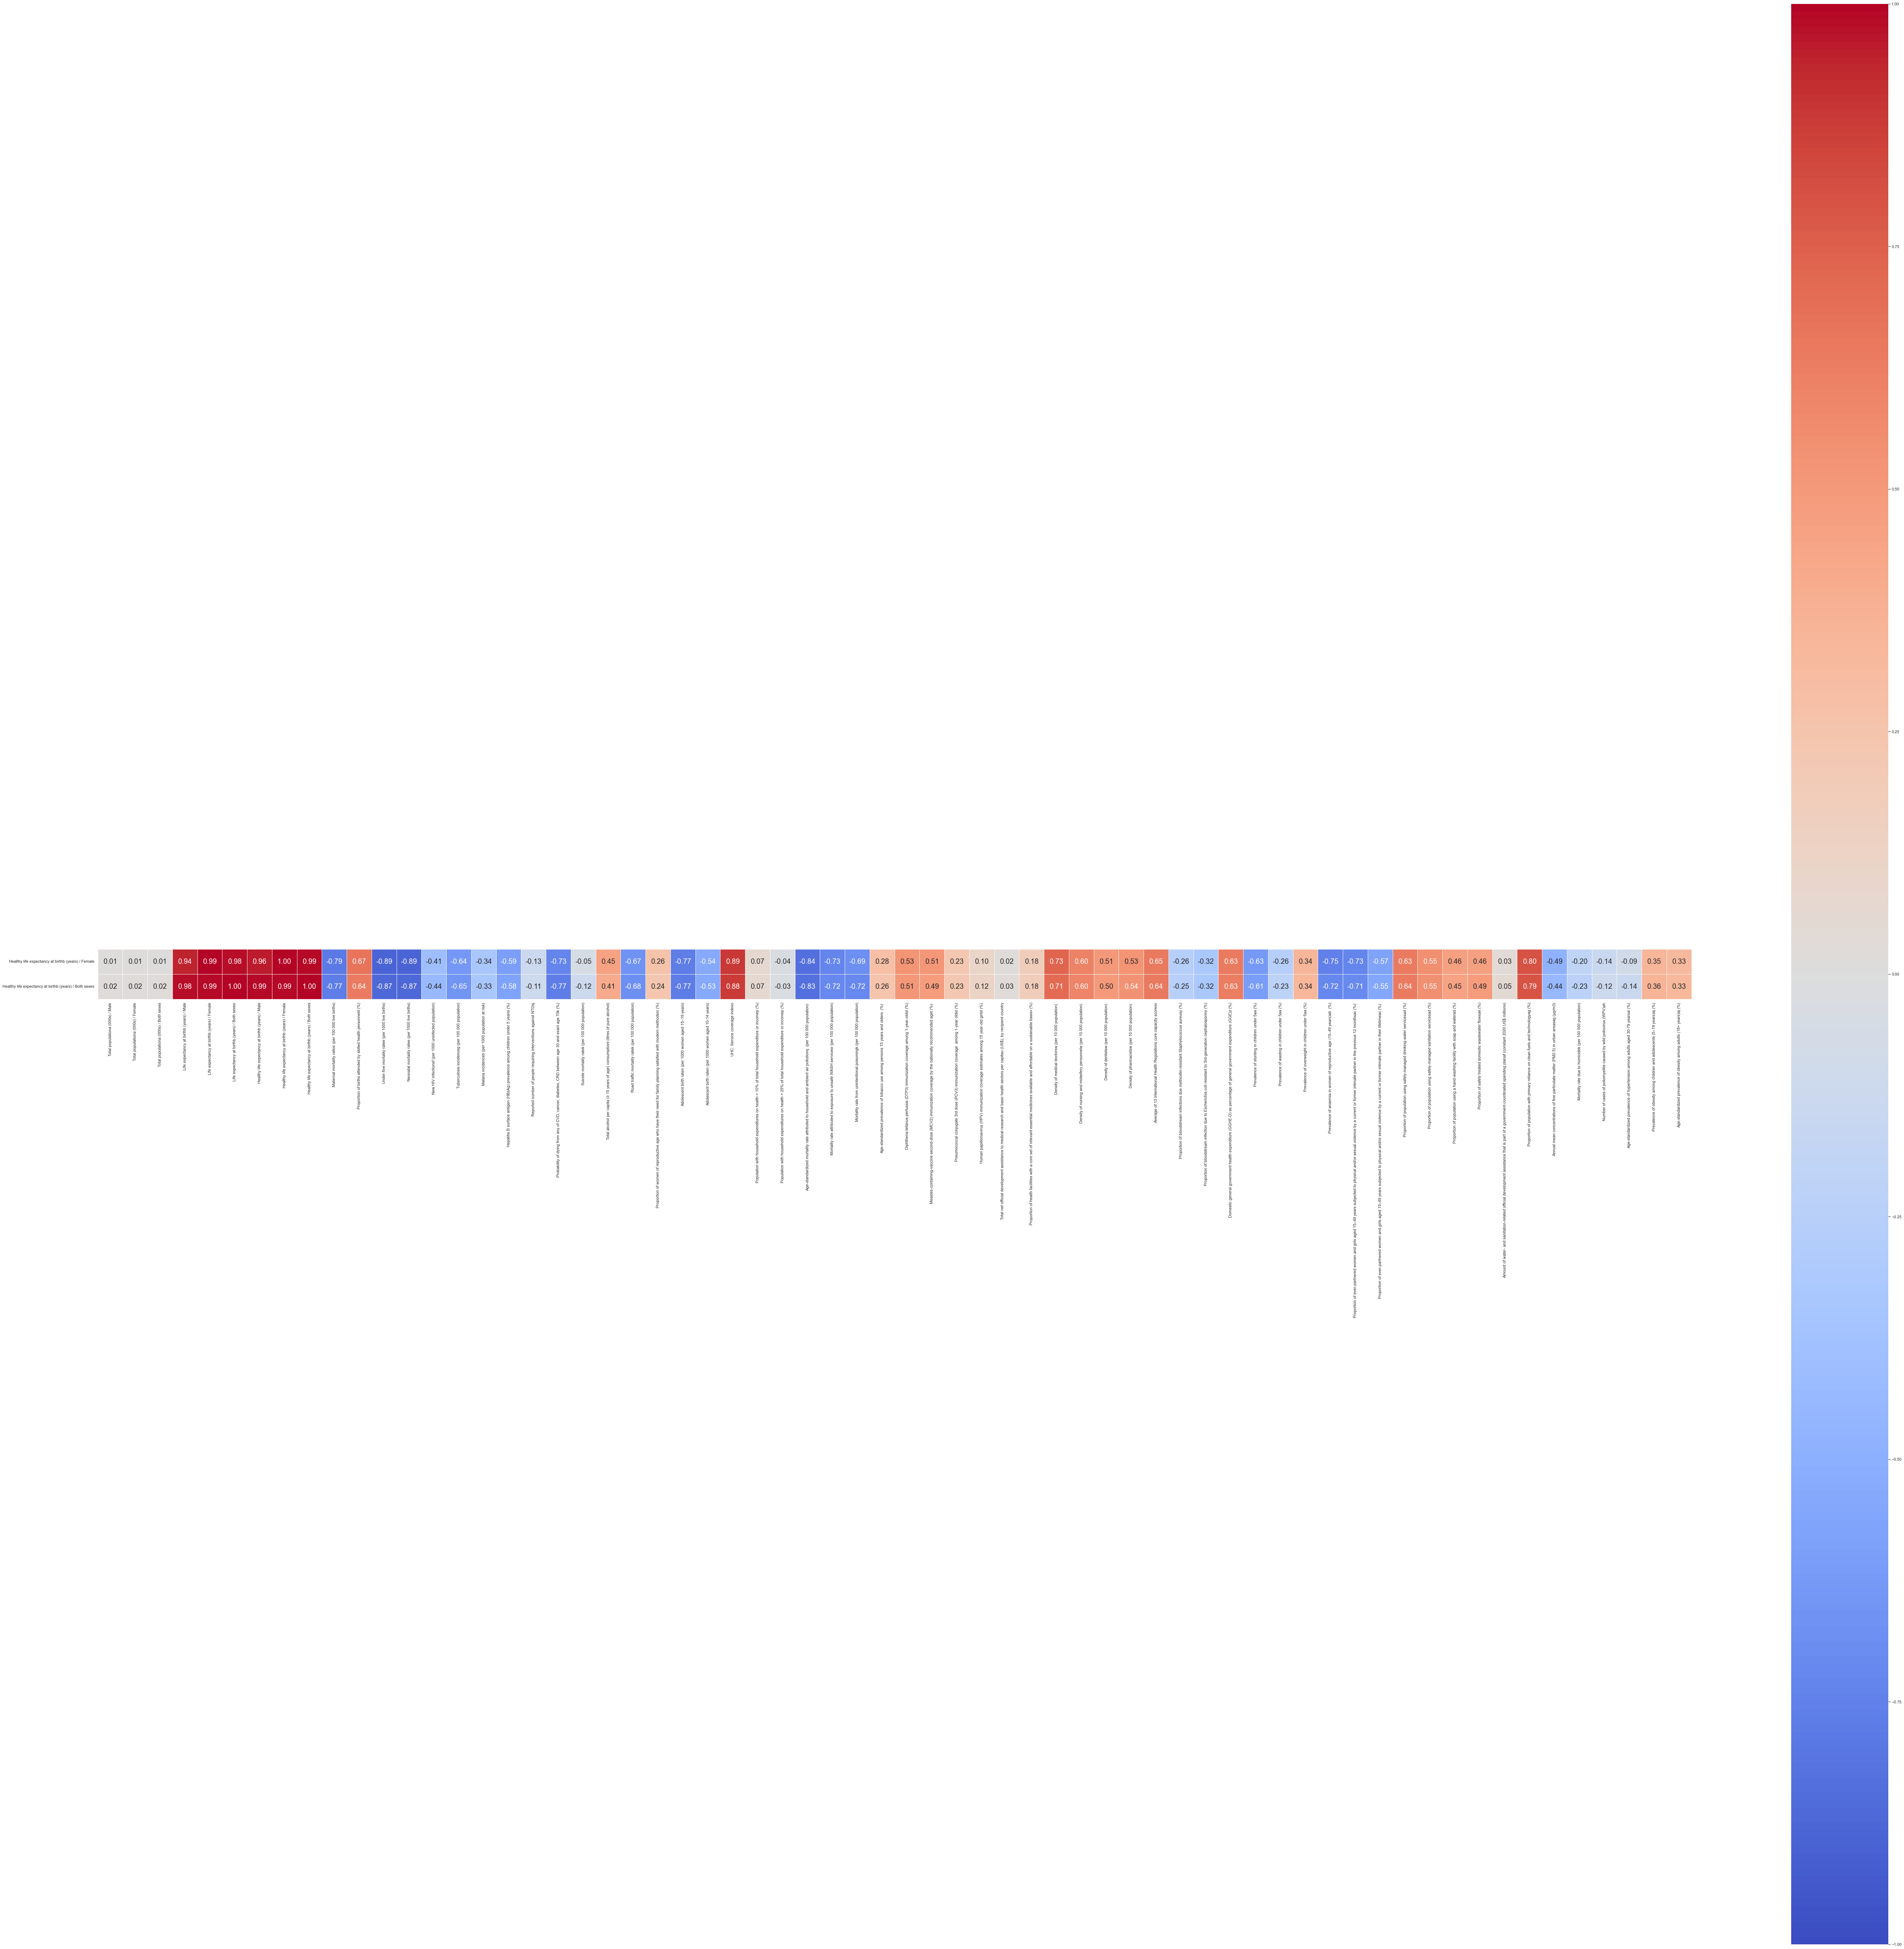

In [114]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df.corr()
f = plt.figure(figsize=(100, 100))
sb.heatmap(numeric_df.corr().iloc[7:9], vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 20},cmap='coolwarm', square=True,)


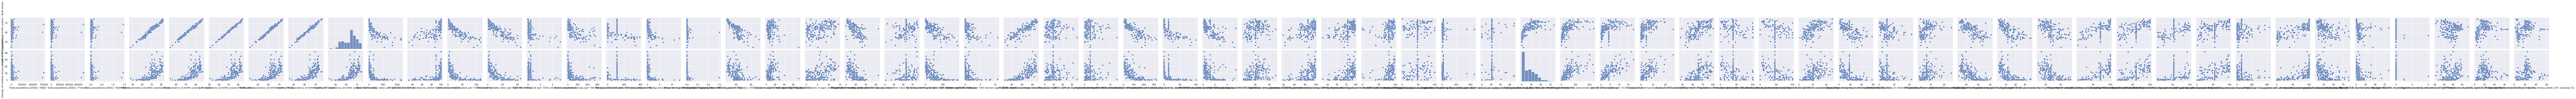

In [115]:
sb.pairplot(data = numeric_df,y_vars =['Healthy life expectancy at birthb (years) / Both sexes','Density of medical doctorsw (per 10 000 population) '] )

In [122]:
from sklearn.model_selection import train_test_split

X = numeric_df[['UHC: Service coverage indexo', 
                'Age-standardized mortality rate attributed to household and ambient air pollutionq  (per 100 000 population) ', 
                'Proportion of population with primary reliance on clean fuels and technologyag (%)', 
                'Proportion of ever-partnered women and girls aged 15–49 years subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 monthsac (%) ', 
                'Prevalence of anaemia in women of reproductive age (15–49 years)ab  (%)','Density of medical doctorsw (per 10 000 population) ',
                'Maternal mortality ratioc (per 100 000 live births)',
                'Neonatal mortality ratee (per 1000 live births)',
                'Probability of dying from any of CVD, cancer, diabetes, CRD between age 30 and exact age 70k (%)',
                'Mortality rate attributed to exposure to unsafe WASH servicesr (per 100 000 population)',
                'Mortality rate from unintentional poisoningk (per 100 000 population)',
               ]]  # Replace with the actual names of your variables
y = numeric_df['Healthy life expectancy at birthb (years) / Both sexes']  # Replace with 



Proportion of ever-partnered women and girls aged 15–49 years subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 monthsac (%) 

In [124]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

UHC: Service coverage indexo
Age-standardized mortality rate attributed to household and ambient air pollutionq  (per 100 000 population) 
Proportion of population with primary reliance on clean fuels and technologyag (%)


In [125]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train) 

LinearRegression()

Intercept of Regression 	: b =  72.68634510433931
Coefficients of Regression 	: a =  [ 0.01292635  0.00718495  0.00336051 -0.05108634 -0.03373749  0.0319135
 -0.00537771 -0.11930681 -0.33963664 -0.0311517  -0.53439029]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9336681322041985
Mean Squared Error (MSE) 	: 2.4588692512676844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9403246021094096
Mean Squared Error (MSE) 	: 2.0305049306780143



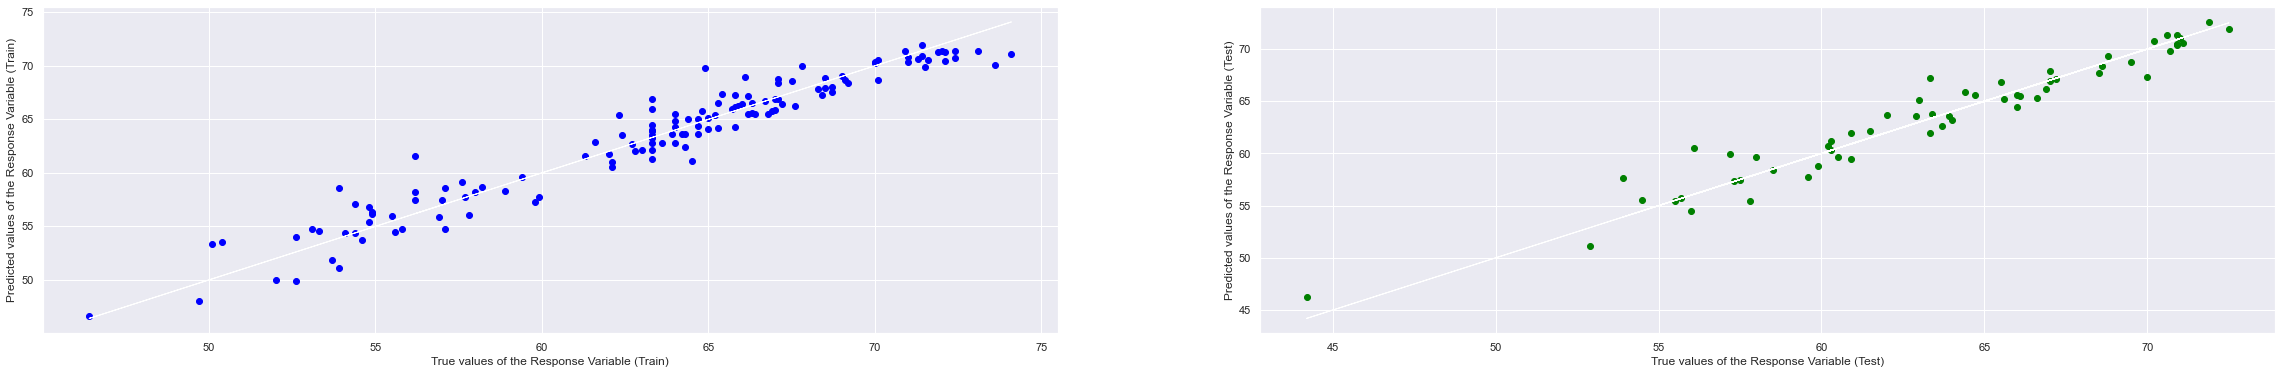

In [126]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(40, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9876422478339276
Mean Squared Error (MSE) 	: 2.4588692512676844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8734570357782317
Mean Squared Error (MSE) 	: 2.0305049306780143



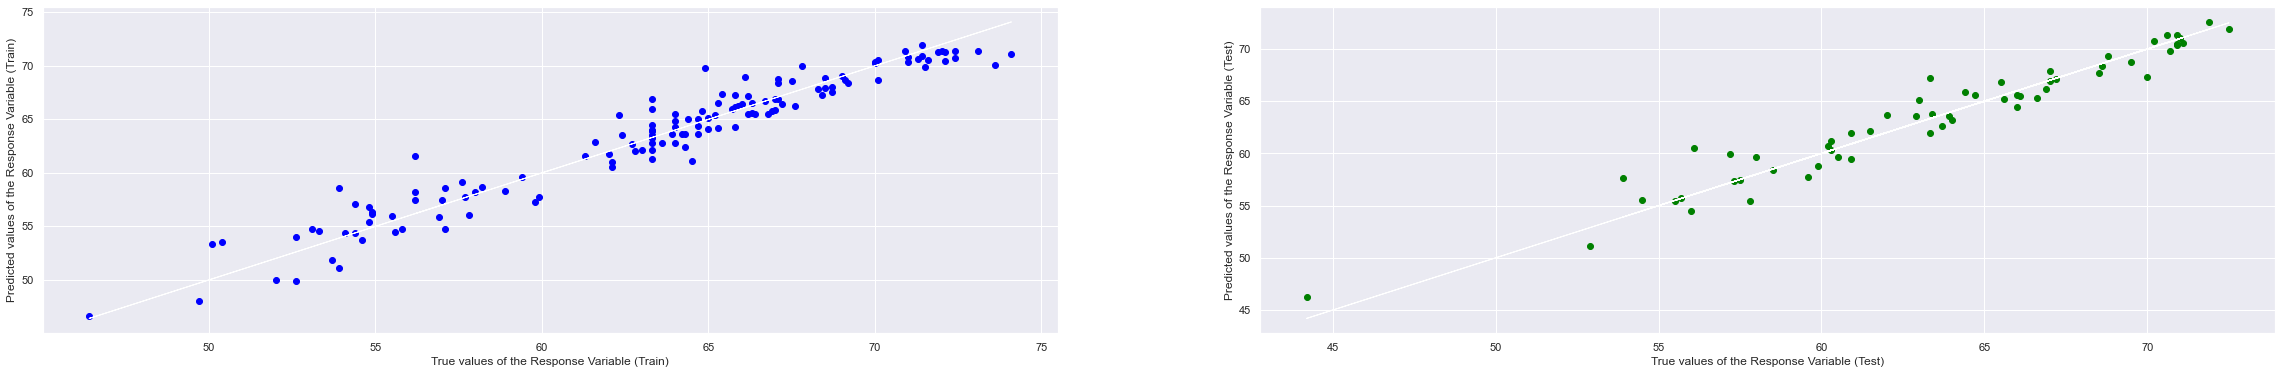

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# create a random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the regressor to your data
regressor.fit(X_train, y_train)

# make predictions
y_pred = regressor.predict(X_test)

# Coefficients of the Linear Regression line
# print('Intercept of Regression \t: b = ', regressor.intercept_)
# print('Coefficients of Regression \t: a = ', regressor.coef_)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(40, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values

OOB score: 	 0.9048518907329709
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9871407521604294
Mean Squared Error (MSE) 	: 2.4588692512676844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8675267435816543
Mean Squared Error (MSE) 	: 2.0305049306780143



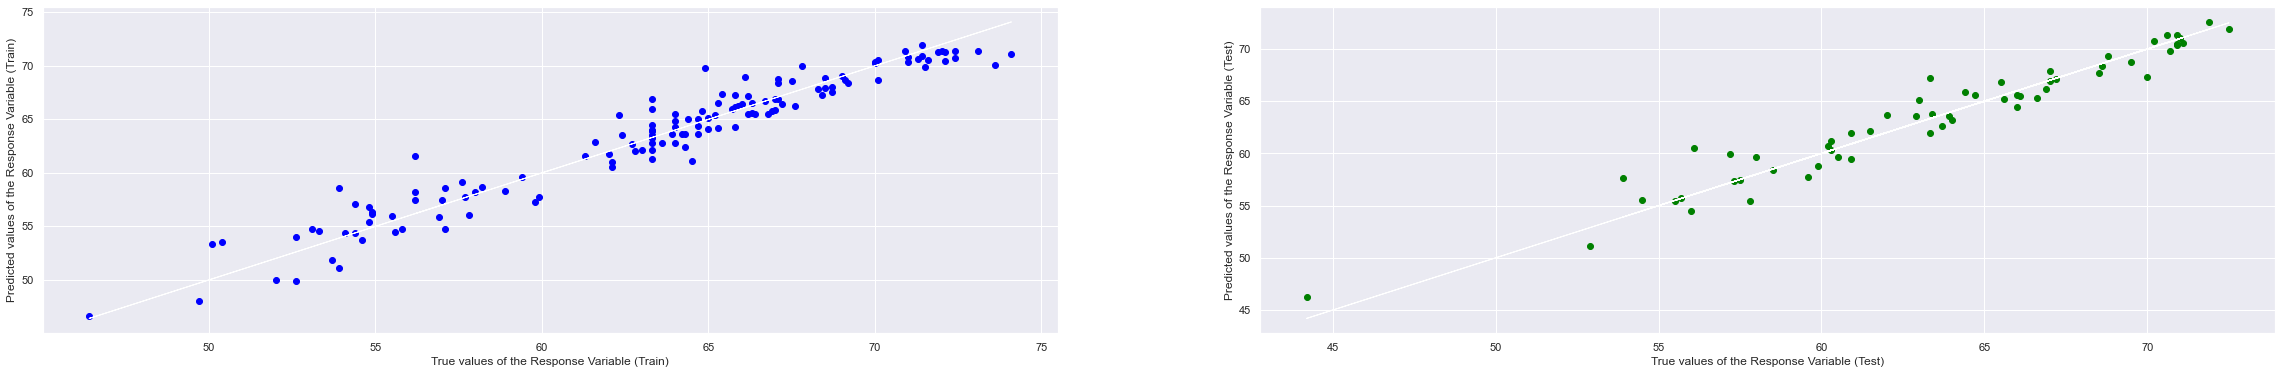

In [139]:
# create a random forest regressor
regressor = RandomForestRegressor(n_estimators=300, oob_score = True, random_state=0)

# fit the regressor to your data
regressor.fit(X_train, y_train)

print("OOB score: \t", regressor.oob_score_)

# make predictions
y_pred = regressor.predict(X_test)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(40, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9276044964089163
Mean Squared Error (MSE) 	: 2.4588692512676844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9378678801857524
Mean Squared Error (MSE) 	: 2.0305049306780143



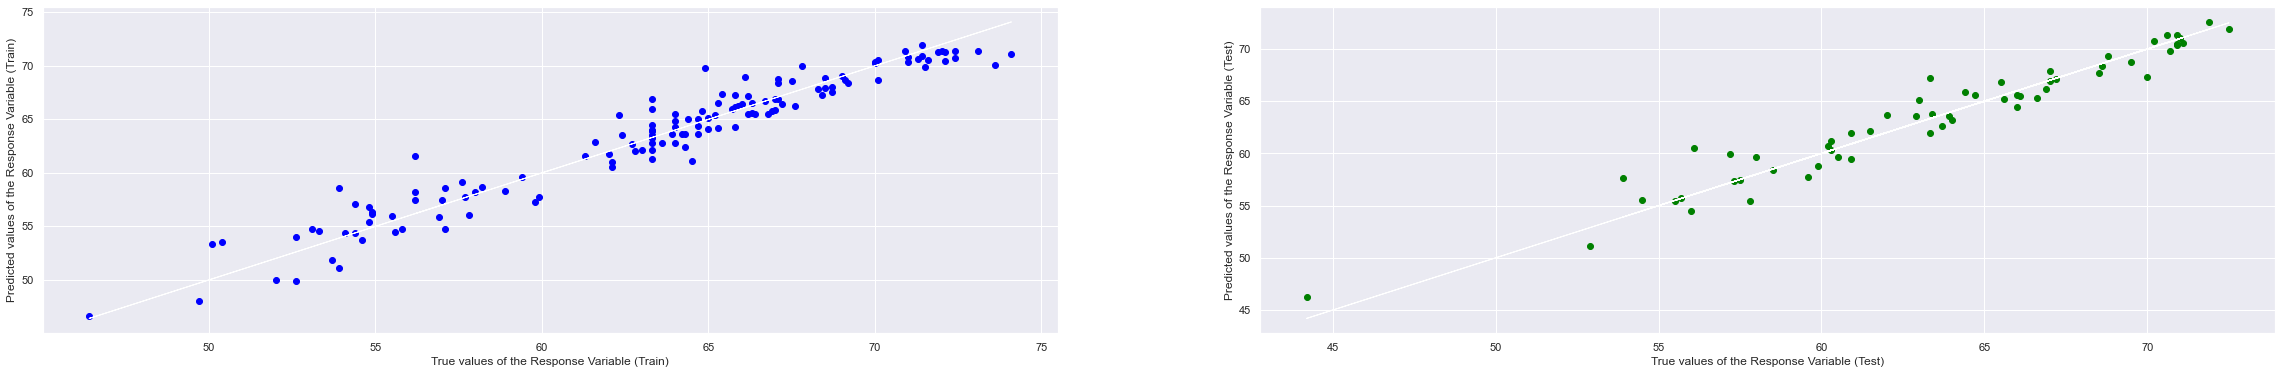

In [135]:
from sklearn.linear_model import Lasso

# create a lasso regressor
regressor = Lasso(alpha=1.0)

# fit the regressor to your data
regressor.fit(X_train, y_train)
# make predictions
y_pred = regressor.predict(X_test)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(40, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7636503886934137
Mean Squared Error (MSE) 	: 2.4588692512676844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7466524973357784
Mean Squared Error (MSE) 	: 2.0305049306780143



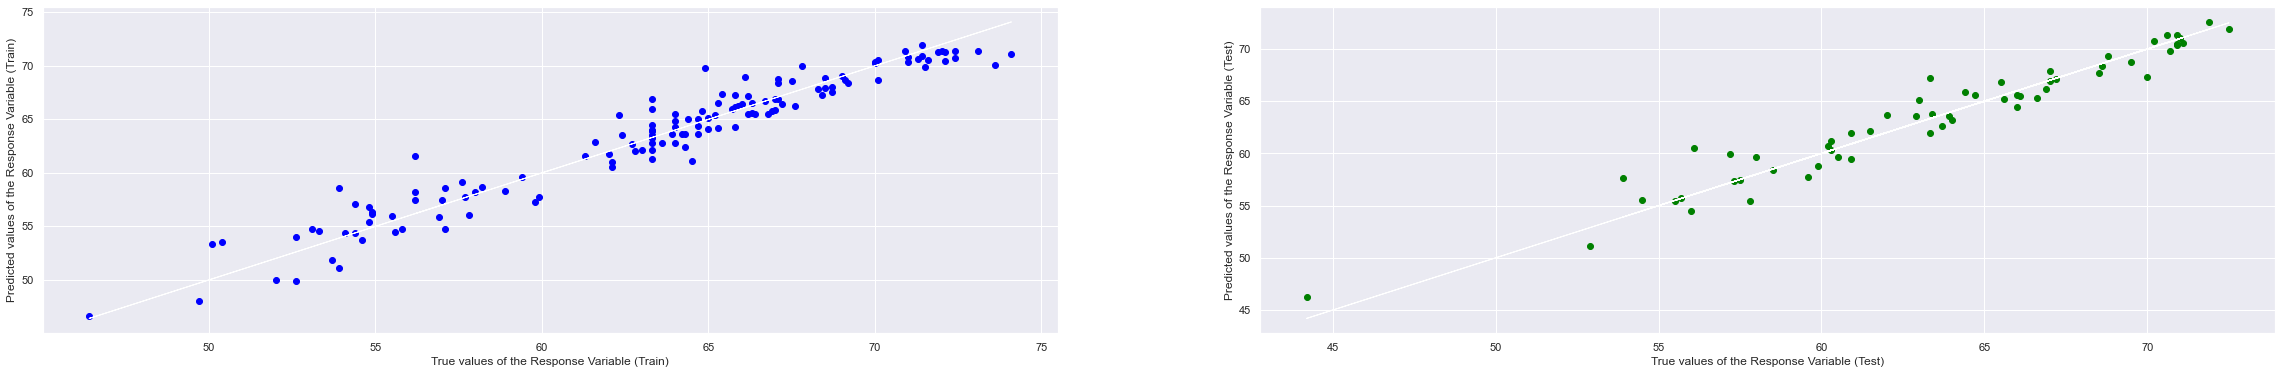

In [136]:
from sklearn.svm import SVR

# create an SVR model
regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# fit the regressor to your data
regressor.fit(X_train, y_train)

# make predictions
y_pred = regressor.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(40, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9336672960345943
Mean Squared Error (MSE) 	: 2.4588692512676844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9403478390246273
Mean Squared Error (MSE) 	: 2.0305049306780143



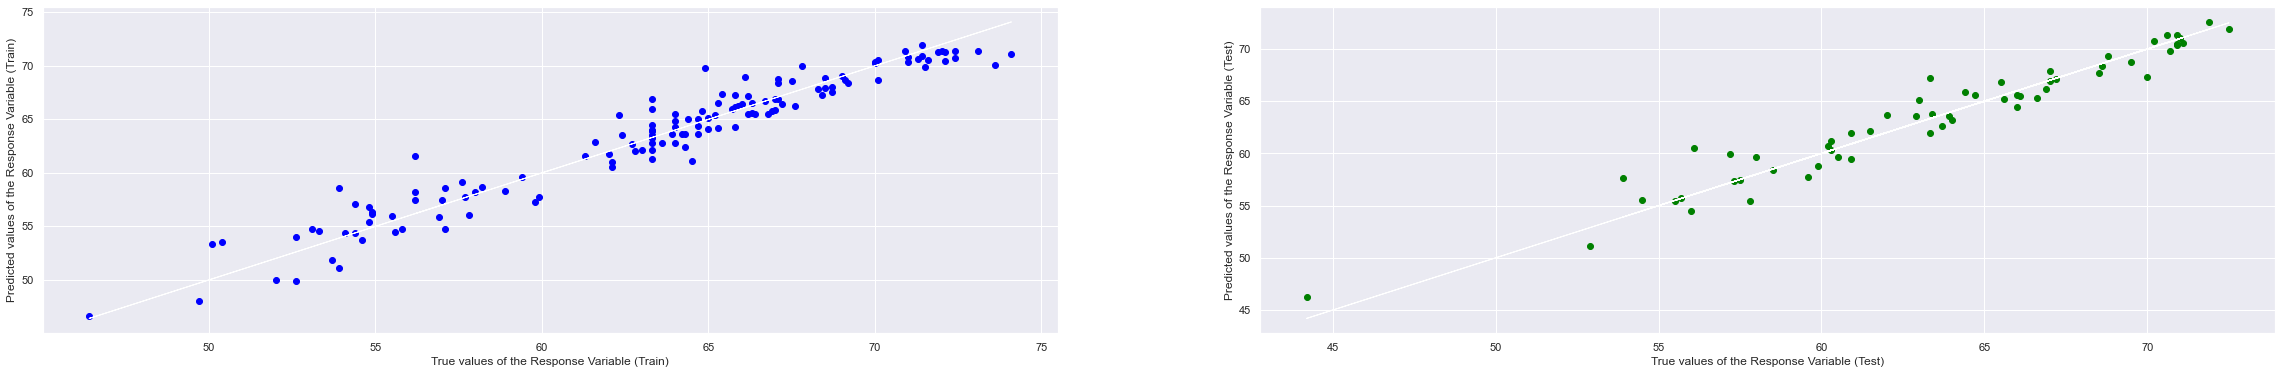

In [140]:
from sklearn.linear_model import Ridge

# create a ridge regressor with L2 regularization
regressor = Ridge(alpha=1.0)

# fit the regressor to your data
regressor.fit(X_train, y_train)

# make predictions
y_pred = regressor.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(40, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -2.7912405971727754
Mean Squared Error (MSE) 	: 2.4588692512676844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -3.734105530204679
Mean Squared Error (MSE) 	: 2.0305049306780143



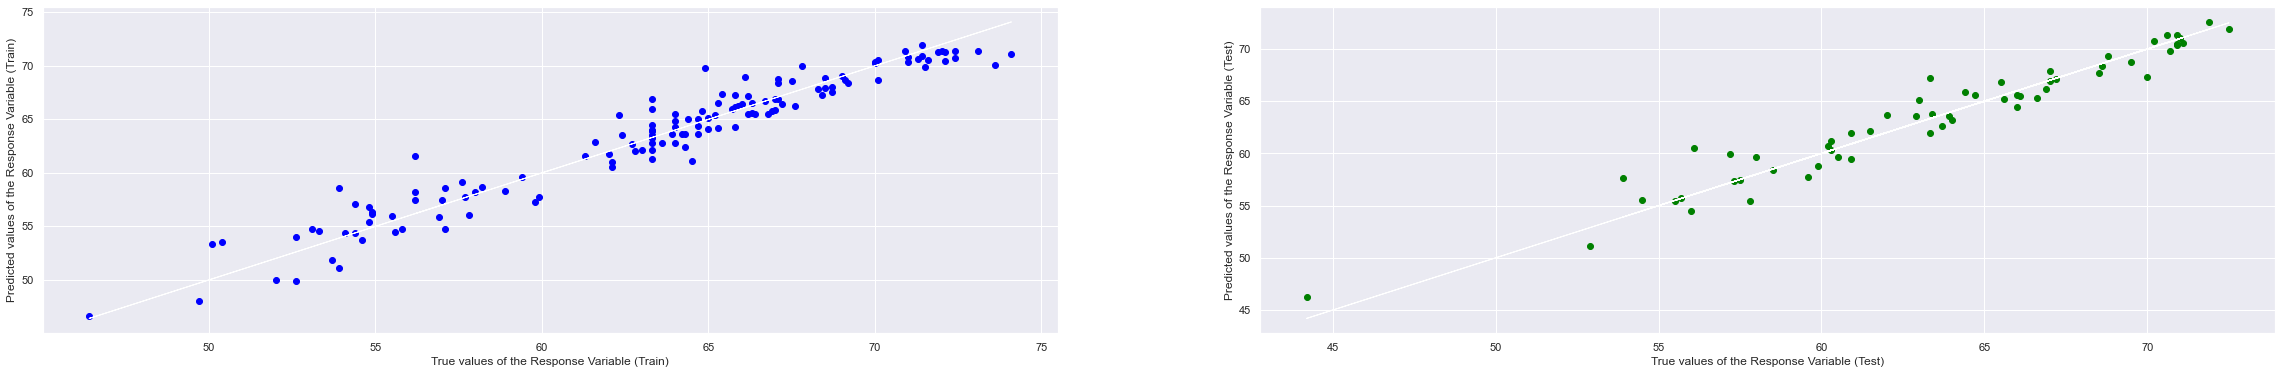

In [142]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 100),
    alpha=0.001,
    random_state=20,
    early_stopping=False
)
#
# Train the model
#
regressor.fit(X_train, y_train)

# make predictions
y_pred = regressor.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(40, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
